<a href="https://colab.research.google.com/github/amansyayf/ml-course/blob/master/week0_03_linear_classification/week0_03_intro_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### week0_03
### Intro to PyTorch



*special thanks to YSDA team for provided materials*

What comes today:
- Introduction to PyTorch
- Automatic gradient computation
- Logistic regression (it's a neural network, actually ;) )

![img](https://pytorch.org/tutorials/_static/pytorch-logo-dark.svg)

__This notebook__ will teach you to use pytorch low-level core. You can install it [here](http://pytorch.org/).

__Pytorch feels__ differently than other frameworks (like tensorflow/theano) on almost every level. TensorFlow makes your code live in two "worlds" simultaneously:  symbolic graphs and actual tensors. First you declare a symbolic "recipe" of how to get from inputs to outputs, then feed it with actual minibatches of data.  In pytorch, __there's only one world__: all tensors have a numeric value.

You compute outputs on the fly without pre-declaring anything. The code looks exactly as in pure numpy with one exception: pytorch computes gradients for you. And can run stuff on GPU. And has a number of pre-implemented building blocks for your neural nets. [And a few more things.](https://medium.com/towards-data-science/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b)

Let's dive into it!

In [3]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/week0_03_linear_classification/notmnist.py

--2023-04-19 19:54:04--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/week0_03_linear_classification/notmnist.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-04-19 19:54:04 ERROR 404: Not Found.



In [1]:
import numpy as np
import torch
print(torch.__version__)

2.0.0+cu118


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# numpy world

x = np.arange(16).reshape(4,4)

print("X :\n%s\n" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s\n" % (x + 5))
print("X*X^T  :\n%s\n" % np.dot(x,x.T))
print("mean over cols :\n%s\n" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s\n" % (np.cumsum(x,axis=0)))

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

X.shape : (4, 4)

add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]

X*X^T  :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]

mean over cols :
[ 1.5  5.5  9.5 13.5]

cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]



In [5]:
# pytorch world

x = np.arange(16).reshape(4,4)

x = torch.tensor(x, dtype=torch.float32) #or torch.arange(0,16).view(4,4)

print ("X :\n%s" % x)
print("X.shape : %s\n" % (x.shape,))
print ("add 5 :\n%s" % (x + 5))
print ("X*X^T  :\n%s" % torch.matmul(x,x.transpose(1,0)))  #short: x.mm(x.t())
print ("mean over cols :\n%s" % torch.mean(x,dim=-1))
print ("cumsum of cols :\n%s" % torch.cumsum(x,dim=0))

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
X.shape : torch.Size([4, 4])

add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


#### NumPy and Pytorch

As you can notice, pytorch allows you to hack stuff much the same way you did with numpy. This means that you can _see the numeric value of any tensor at any moment of time_. Debugging such code can be done with by printing tensors or using any debug tool you want (e.g. [gdb](https://wiki.python.org/moin/DebuggingWithGdb)).

You could also notice the a few new method names and a different API. So no, there's no compatibility with numpy [yet](https://github.com/pytorch/pytorch/issues/2228) and yes, you'll have to memorize all the names again. Get excited!

![img](http://i0.kym-cdn.com/entries/icons/original/000/017/886/download.jpg)

For example, 
* If something takes a list/tuple of axes in numpy, you can expect it to take *args in pytorch
 * `x.reshape([1,2,8]) -> x.view(1,2,8)`
* You should swap _axis_ for _dim_ in operations like mean or cumsum
 * `x.sum(axis=-1) -> x.sum(dim=-1)`
* most mathematical operations are the same, but types an shaping is different
 * `x.astype('int64') -> x.type(torch.LongTensor)`

To help you acclimatize, there's a [table](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users) covering most new things. There's also a neat [documentation page](http://pytorch.org/docs/master/).

Finally, if you're stuck with a technical problem, we recommend searching [pytorch forumns](https://discuss.pytorch.org/). Or just googling, which usually works just as efficiently. 

If you feel like you almost give up, remember two things: __GPU__ and __free gradients__. Besides you can always jump back to numpy with x.numpy()

### Warmup: trigonometric knotwork
_inspired by [this post](https://www.quora.com/What-are-the-most-interesting-equation-plots)_

There are some simple mathematical functions with cool plots. For one, consider this:

$$ x(t) = t - 1.5 * cos( 15 t) $$
$$ y(t) = t - 1.5 * sin( 16 t) $$


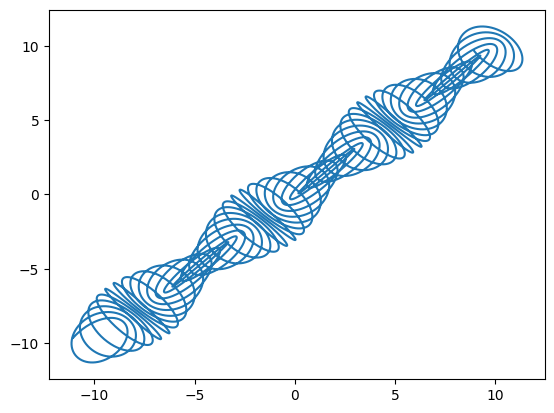

In [8]:
t = torch.linspace(-10, 10, steps = 10000)

# compute x(t) and y(t) as defined above
x = t - 1.5 * torch.cos(15*t)
y = t - 1.6 * torch.sin(16*t)

plt.plot(x.numpy(), y.numpy())

if you're done early, try adjusting the formula and seing how  it affects the function

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


## Automatic gradients

Any self-respecting DL framework must do your backprop for you. Torch handles this with the `autograd` module.

The general pipeline looks like this:
* When creating a tensor, you mark it as `requires_grad`:
    * __```torch.zeros(5, requires_grad=True)```__
    * torch.tensor(np.arange(5), dtype=torch.float32, requires_grad=True)
* Define some differentiable `loss = arbitrary_function(a)`
* Call `loss.backward()`
* Gradients are now available as ```a.grads```

__Here's an example:__ let's fit a linear regression on Boston house prices

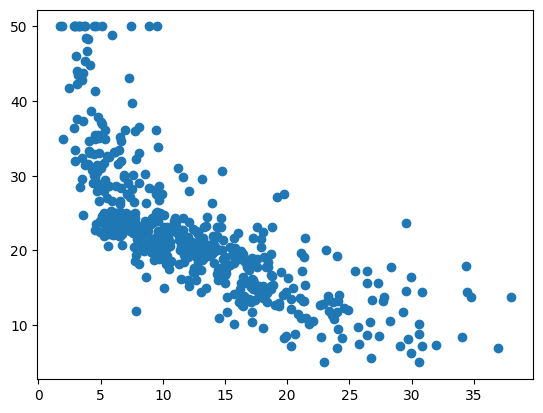

In [26]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

plt.scatter(boston[:, -1], target)

In [27]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston[:,-1] / 10, dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

In [28]:
y_pred = w * x + b
loss = torch.mean( (y_pred - y)**2 )

# propagete gradients
loss.backward()

The gradients are now stored in `.grad` of those variables that require them.

In [29]:
print("dL/dw = {}\n".format(w.grad))
print("dL/db = {}\n".format(b.grad))

dL/dw = tensor([-47.3514])

dL/db = tensor([-45.0656])



If you compute gradient from multiple losses, the gradients will add up at variables, therefore it's useful to __zero the gradients__ between iteratons.

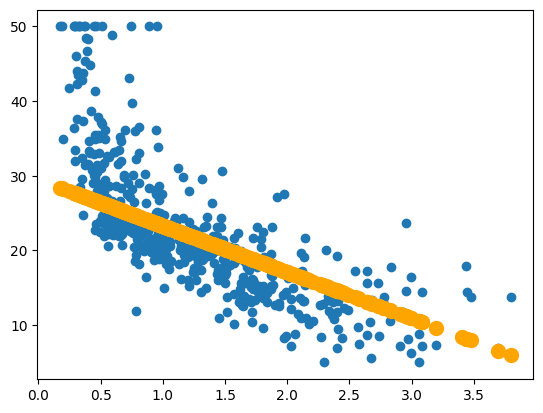

loss =  44.815567


In [30]:
from IPython.display import clear_output

w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston[:,-1] / 10, dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

for i in range(100):

    y_pred = w * x  + b
    loss = torch.mean( (y_pred - y)**2 )
    loss.backward()

    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

__Quest__: try implementing and writing some nonlinear regression. You can try quadratic features or some trigonometry, or a simple neural network. The only difference is that now you have more variables and a more complicated `y_pred`. 

________________________________________________________________
________________________________________________________________
________________________________________________________________
________________________________________________________________
________________________________________________________________
________________________________________________________________
Suprizingly, we were walking really close to the edge. Look a few cells above. We have divided the `x` values by 10 times. Let's what happens if we don't:

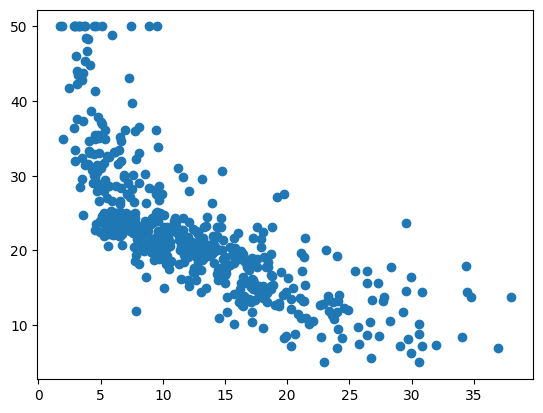

loss =  nan


In [32]:
# Now we do not divide the x values by 10. See what happens next
x = torch.tensor(boston[:,-1], dtype=torch.float32)

w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

grad_history = []

for i in range(100):

    y_pred = w * x  + b
    loss = torch.mean( (y_pred - y)**2 )
    loss.backward()
    grad_history.append((w.grad.item(), b.grad.item()))

    # Be extremely careful with accessing the .data attribute!
    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break


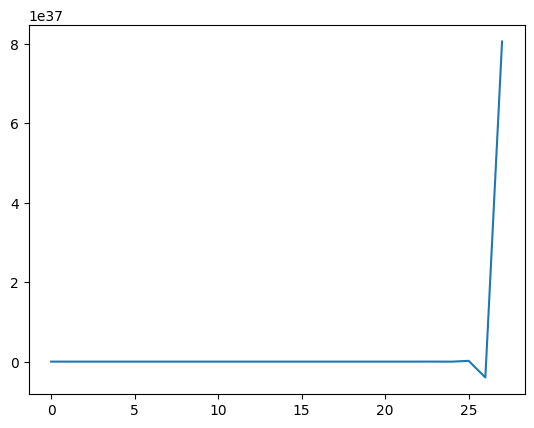

In [33]:
plt.plot([element[0] for element in grad_history], )

In [34]:
print(grad_history)

[(-473.5144958496094, -45.06561279296875), (9574.380859375, 558.5819091796875), (-193146.109375, -11611.80078125), (3896813.75, 233938.40625), (-78619616.0, -4720118.5), (1586179328.0, 95229784.0), (-32001746944.0, -1921295872.0), (645646909440.0, 38762848256.0), (-13026162900992.0, -782054588416.0), (262807589224448.0, 15778237644800.0), (-5302239132385280.0, -318331735244800.0), (1.0697461300251853e+17, 6422458408108032.0), (-2.1582518525655777e+18, -1.2957544387864166e+17), (4.354351919016182e+19, 2.614231831549051e+18), (-8.785064832620476e+20, -5.274308460125199e+19), (1.772418992719395e+22, 1.0641110829050542e+21), (-3.5759200736630464e+23, -2.146883281226081e+22), (7.214548700883164e+24, 4.331415124113106e+23), (-1.455561554891737e+26, -8.738787599253472e+24), (2.9366487550019813e+27, 1.763082244723649e+26), (-5.924796215150439e+28, -3.557083003402266e+27), (1.195349280428902e+30, 7.17654445403173e+28), (-2.4116609718921758e+31, -1.4478940352621255e+30), (4.865614230945225e+32, 

As you can see, the gradients have exploded. We could avoid it by using the smaller _learning rate_ or by using _gradient clipping_.

__You should be really careful using the gradient descent even with such simple models as linear or logistic regression.__

**Remember!**
![img](https://media.giphy.com/media/3o751UMCYtSrRAFRFC/giphy.gif)

When dealing with more complex stuff like neural network, it's best if you use tensors the way samurai uses his sword. 


```

```

```

```

```

```

```

```

```

```
### More about pytorch:
* Using torch on GPU and multi-GPU - [link](http://pytorch.org/docs/master/notes/cuda.html)
* More tutorials on pytorch - [link](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* Pytorch examples - a repo that implements many cool DL models in pytorch - [link](https://github.com/pytorch/examples)
* Practical pytorch - a repo that implements some... other cool DL models... yes, in pytorch - [link](https://github.com/spro/practical-pytorch)
* And some more - [link](https://www.reddit.com/r/pytorch/comments/6z0yeo/pytorch_and_pytorch_tricks_for_kaggle/)